In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from proj1_helpers import *
from implementations import *
from annexe import *
import seaborn as sns

In [2]:
train_set = load_csv_data('/Users/bedanian/Desktop/Machine Learning/Project 1/train.csv', sub_sample = True)
test_set = load_csv_data('/Users/bedanian/Desktop/Machine Learning/Project 1/test.csv', sub_sample = False)

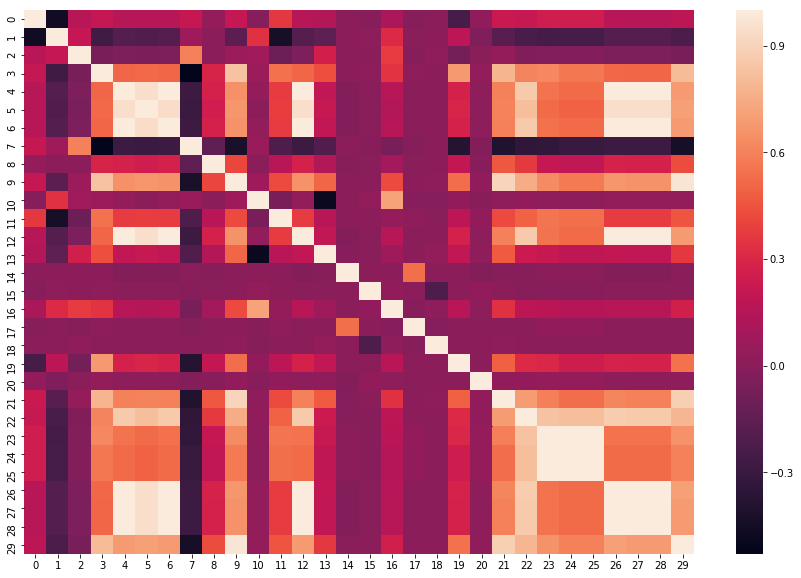

In [9]:
# calculate the correlation matrix
x_train = train_set[1]
y_train = train_set[0]
df = pd.DataFrame(x_train)
corr = df.corr()
# plot the heatmap
plt.figure(1, figsize = (15, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [54]:
print(df[22].drop_duplicates())

0     2.0
1     1.0
6     0.0
37    3.0
Name: 22, dtype: float64


In [48]:
def split(data_set, indice):
    y_set = data_set[0]
    x_set = data_set[1]
    id_set = data_set[2]
    return (y_set[x_set[:,22] == indice],x_set[x_set[:,22] == indice],id_set[x_set[:,22] == indice])

def replace_mean(x_set):
    x_set[x_set == -999] = np.nan
    list_mean = x_set.mean(axis = 0)
    for i in range(0,len(list_mean)):
        x_set[np.isnan(x_set[:,i])] = list_mean[i]
    return x_set

def get_na_columns(array, threshold, value):
    na_indices = []
    for ind, row in enumerate(array.T):
        count_na = 0
        for j in range(len(row)):
            if row[j] == value:
                count_na += 1
        if (count_na/len(row)) > threshold:
            na_indices.append(ind)
    return na_indices

def standardize(x_train, x_test):
    mean = np.mean(x_train)
    norm = np.linalg.norm(x_train)
    x_train_std = (x_train - mean)/norm
    x_test_std = (x_test - mean)/norm
    return x_train_std, x_test_std

def sigmoid(x):
    return 0.5 * (1 + np.tanh(0.5*x))

def zero_to_neg(array):
    ret = np.zeros(len(array))
    for i, v in enumerate(array):
        if v == 0:
            ret[i] = -1
        else:
            ret[i] = v
    return ret

def build_poly(x, degree):
    poly = x
    for deg in range(2, degree+1):
        poly = np.concatenate((poly, np.power(x, deg)), axis = 1)
    return poly

In [73]:
#Preprocessing
#split the datset based on column 22 value
#train
(y_train_0,x_train_0,id_train_0) = split(train_set, 0)
(y_train_1,x_train_1,id_train_1) = split(train_set, 1)
(y_train_2,x_train_2,id_train_2) = split(train_set, 2)
(y_train_3,x_train_3,id_train_3) = split(train_set, 3)
#test
(y_test_0,x_test_0,id_test_0) = split(test_set, 0)
(y_test_1,x_test_1,id_test_1) = split(test_set, 1)
(y_test_2,x_test_2,id_test_2) = split(test_set, 2)
(y_test_3,x_test_3,id_test_3) = split(test_set, 3)

#clean column of nan
nan_0 = get_na_columns(x_train_0, 0.90, -999)
x_train_0 = np.delete(x_train_0, nan_0 , axis = 1)
x_test_0 = np.delete(x_test_0, nan_0 , axis = 1)

nan_1 = get_na_columns(x_train_1, 0.90, -999)
x_train_1 = np.delete(x_train_1, nan_1 , axis = 1)
x_test_1 = np.delete(x_test_1, nan_1 , axis = 1)

nan_2 = get_na_columns(x_train_2, 0.90, -999)
x_train_2 = np.delete(x_train_2, nan_2, axis = 1)
x_test_2 = np.delete(x_test_2, nan_2, axis = 1)

nan_3 = get_na_columns(x_train_3, 0.90, -999)
x_train_3 = np.delete(x_train_3, nan_3, axis = 1)
x_test_3 = np.delete(x_test_3, nan_3, axis = 1)

#cleaning last nan
x_train_0 = replace_mean(x_train_0)
x_train_1 = replace_mean(x_train_1)
x_train_2 = replace_mean(x_train_2)
x_train_3 = replace_mean(x_train_3)

x_test_0 = replace_mean(x_test_0)
x_test_1 = replace_mean(x_test_1)
x_test_2 = replace_mean(x_test_2)
x_test_3 = replace_mean(x_test_3)

#standardize
(x_train_0,x_test_0) = standardize(x_train_0,x_test_0)
(x_train_1,x_test_1) = standardize(x_train_1,x_test_1)
(x_train_2,x_test_2) = standardize(x_train_2,x_test_2)
(x_train_3,x_test_3) = standardize(x_train_3,x_test_3)

In [63]:
len(y_train_1)

1540

In [72]:
len(x_test_0[0])

30

In [74]:
(w_0,_) = least_squares(y_train_0, x_train_0)
(w_1,_) = least_squares(y_train_1, x_train_1)
(w_2,_) = least_squares(y_train_2, x_train_2)
(w_3,_) = least_squares(y_train_3, x_train_3)

y_0 = zero_to_neg(np.around(sigmoid(x_test_0 @ w_0)))
y_1 = zero_to_neg(np.around(sigmoid(x_test_1 @ w_1)))
y_2 = zero_to_neg(np.around(sigmoid(x_test_2 @ w_2)))
y_3 = zero_to_neg(np.around(sigmoid(x_test_3 @ w_3)))

In [76]:
y = np.concatenate((y_0,y_1,y_2,y_3))
id_test = np.concatenate((id_test_0,id_test_1,id_test_2,id_test_3))
create_csv_submission(ids_test, y, 'prediction.csv')

NameError: name 'ids_test' is not defined